In [1]:
import cv2
import os
import numpy as np 
from IPython.display import Image  # for displaying images
from PIL import Image, ImageDraw, ImageFilter 
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import easyocr
import imutils  

In [5]:
image_file = "yolov7\\runs\\detect\\yolo_road_det2\\image-792-47_jpg.rf.78cb01307da1dc24895602f42c6c96db\\2.jpg"
img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
img_erode = cv2.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

# Get contours
contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

output = img.copy()

for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    # print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])
    # hierarchy[i][0]: the index of the next contour of the same level
    # hierarchy[i][1]: the index of the previous contour of the same level
    # hierarchy[i][2]: the index of the first child
    # hierarchy[i][3]: the index of the parent
    if hierarchy[0][idx][3] == 0:
        cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)


cv2.imshow("Input", img)
cv2.imshow("Enlarged", img_erode)
cv2.imshow("Output", output)
cv2.waitKey(0)

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

8
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Epoch 1/10
1875/1875 [==============================] - 36s 18ms/step - loss: 0.2124 - accuracy: 0.9353
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0865 - accuracy: 0.9734
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0603 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0460 - accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0348 - accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0307 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0250 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0209 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/

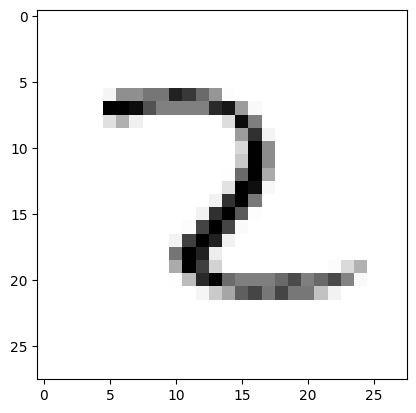

In [10]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


# Importing the required Keras modules containing model and layers
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

model.evaluate(x_test, y_test)

image_index = 2500
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [9]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 [==============================] - 0s 33ms/step
2


(1, 28, 28, 1)
1/1 [==============================] - 0s 29ms/step
3


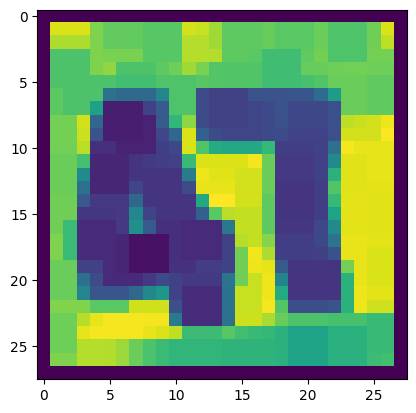

In [28]:
img = load_img("yolov7\\runs\\detect\\yolo_road_det2\\image-792-47_jpg.rf.78cb01307da1dc24895602f42c6c96db\\2.jpg", target_size=(26, 26))
cmyk_img = img.convert("CMYK")
gray_img = img.convert("L")
gray_img = gray_img.filter(ImageFilter.MinFilter(3)) 
img_array = img_to_array(gray_img)
img_array /= 255
img_array = np.pad(img_array, ((1,1),(1,1),(0,0)), mode='constant')
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)
plt.imshow(img_array.reshape((28, 28, 1)))
pred = model.predict(img_array)
print(pred.argmax())

In [39]:
def letters_extract(image_file: str, out_size=28):
    img = cv2.imread(image_file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
    img_erode = cv2.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

    # Get contours
    contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    output = img.copy()

    letters = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        # print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])
        # hierarchy[i][0]: the index of the next contour of the same level
        # hierarchy[i][1]: the index of the previous contour of the same level
        # hierarchy[i][2]: the index of the first child
        # hierarchy[i][3]: the index of the parent
        if hierarchy[0][idx][3] == 0:
            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            letter_crop = gray[y:y + h, x:x + w]
            # print(letter_crop.shape)

            # Resize letter canvas to square
            size_max = max(w, h)
            letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                # Enlarge image top-bottom
                # ------
                # ======
                # ------
                y_pos = size_max//2 - h//2
                letter_square[y_pos:y_pos + h, 0:w] = letter_crop
            elif w < h:
                # Enlarge image left-right
                # --||--
                x_pos = size_max//2 - w//2
                letter_square[0:h, x_pos:x_pos + w] = letter_crop
            else:
                letter_square = letter_crop

            # Resize letter to 28x28 and add letter and its X-coordinate
            letters.append((x, w, cv2.resize(letter_square, (out_size, out_size), interpolation=cv2.INTER_AREA)))

    # Sort array in place by X-coordinate
    letters.sort(key=lambda x: x[0], reverse=False)
    plt.imshow(img)
    return letters

In [37]:
def img_to_str(model: Any, image_file: str):
    letters = letters_extract(image_file)
    s_out = ""
    for i in range(len(letters)):
        dn = letters[i+1][0] - letters[i][0] - letters[i][1] if i < len(letters) - 1 else 0
        s_out += emnist_predict_img(model, letters[i][2])
        if (dn > letters[i][1]/4):
            s_out += ' '
    return s_out

NameError: name 'Any' is not defined

In [43]:
model.save('my_model.h5')

[]


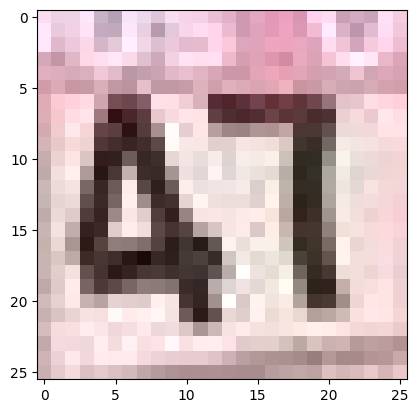

In [42]:
image_file = "yolov7\\runs\\detect\\yolo_road_det2\\image-792-47_jpg.rf.78cb01307da1dc24895602f42c6c96db\\2.jpg"
res = letters_extract(image_file)
print(res)

In [2]:
text = easyocr.Reader(['ru', 'en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [3]:
def fit(img) -> int:
    try:
        img = cv2.imread(img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_filter = cv2.bilateralFilter(gray, 11, 15, 15)
        edges = cv2.Canny(img_filter, 30, 200)
        cont = cv2.findContours(edges.copy(), cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE)
        cont = imutils.grab_contours(cont)
        cont = sorted(cont, key=cv2.contourArea, reverse=True)[:8]

        pos = None
        for c in cont:
            approx = cv2.approxPolyDP(c, 10, True)
            if len(approx) == 4:
                pos = approx
                break

        mask = np.zeros(gray.shape, np.uint8)
        new_img = cv2.drawContours(mask, [pos], 0, 255, -1)
        bitwise_img = cv2.bitwise_and(img, img, mask=mask)
        (x, y) = np.where(mask==255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))
        crop = gray[x1:x2, y1:y2]
        mass_text = text.readtext(crop)
        for x in mass_text:
            match = re.search(r'\d{,3}', x[-2])
            if match.group(0).isdigit():
                return match.group(0)
    except Exception:
        return 0

In [4]:
image = cv2.imread('test_1.png', 0)
print(image.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

(26, 26, 3)


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/BiasAdd' defined at (most recent call last):
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\denzi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\denzi\AppData\Local\Temp\ipykernel_10776\759621995.py", line 6, in <module>
      pred = model.predict(img_array)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\myutils\tracebacutilsls.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\myutils\tracebutilstils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\myutils\tracutilsyutils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\myutils\trutils_myutils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\myutils\utilsck_myutils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\myutilsutilsback_myutils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\denzi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 311, in call
      outputs = tf.nn.bias_add(
Node: 'sequential/conv2d/BiasAdd'
convolution input must be 4-dimensional: [26,26,3]
	 [[{{node sequential/conv2d/BiasAdd}}]] [Op:__inference_predict_function_78609]

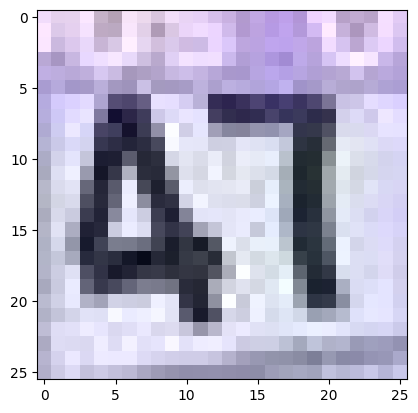

In [30]:
image_file = "yolov7\\runs\\detect\\yolo_road_det2\\image-792-47_jpg.rf.78cb01307da1dc24895602f42c6c96db\\2.jpg"
image = Image.open(image_file)
img_array = np.array(image)
img_array = img_array / 255.0
print(img_array.shape)
pred = model.predict(img_array)
print(pred.argmax())